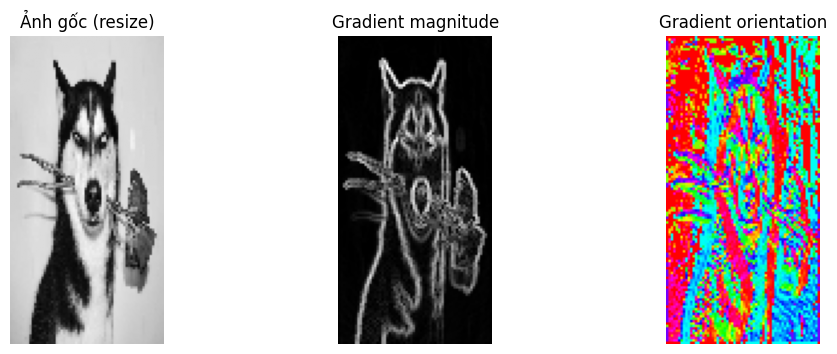

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image_path = "/media/pphong/New Volume/ML & DL/ML/HOG/hinh-cho-hai-husky-ngam-bong.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize về chuẩn (128, 64)
img = cv2.resize(img, (64, 128))

# Tính gradient theo X và Y (Sobel)
gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1, ksize=1)

# Độ lớn và hướng
magnitude, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Ảnh gốc (resize)"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(magnitude, cmap='gray'); plt.title("Gradient magnitude"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(angle, cmap='hsv'); plt.title("Gradient orientation"); plt.axis('off')
plt.show()


In [3]:
# Chia ảnh thành cell 8x8
cell_size = 8
num_bins = 9   # số hướng (0–180 độ chia thành 9 bins)
h, w = img.shape

# HOG feature lưu tại đây
hog_features = []

# Lặp qua các cell
for i in range(0, h, cell_size):
    for j in range(0, w, cell_size):
        # Lấy vùng cell
        mag_cell = magnitude[i:i+cell_size, j:j+cell_size]
        ang_cell = angle[i:i+cell_size, j:j+cell_size]

        # Histogram cho cell này
        hist = np.zeros(num_bins, dtype=float)

        # Duyệt từng pixel trong cell
        for u in range(cell_size):
            for v in range(cell_size):
                mag = mag_cell[u,v]
                ang = ang_cell[u,v]

                # Chuyển hướng về [0,180)
                if ang >= 180:
                    ang -= 180

                # Xác định bin gần nhất
                bin_idx = int(ang // (180/num_bins))
                hist[bin_idx] += mag   # cộng độ lớn vào bin

        hog_features.append(hist)

hog_features = np.array(hog_features).flatten()

print("Độ dài vector HOG:", len(hog_features))
print("Một vài giá trị đầu:", hog_features[:20])


Độ dài vector HOG: 1152
Một vài giá trị đầu: [79.24621105 23.73016334 12.09083247  2.23606801 11.          0.
  2.82842708 16.22678399  9.22212505 31.          6.70820403 19.79898953
  2.23606801 15.          0.          2.82842708  0.          0.
 48.12310553  5.38516474]
